In [122]:
#column = [col for col in graduation.columns if "#" in col or "%" in col]
#for col in column:
 # graduation[col] = pd.to_numeric(graduation[col], errors="coerce")
 # if "#" in col:
  #  graduation[col] = graduation[col].astype("Int64")

# EDA 
##### part 3

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
attendance = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/public-school-attendance-results 2016-2021.csv")
attendance2 = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/public-borough-attendance-results-2019-2024.csv")
regents = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2014-15-to-2022-23-nyc-regents-overall-and-by-category---public 2 (1).csv", low_memory=False)
graduation = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2023-graduation-rates-public-borough.csv")

In [125]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124525 entries, 0 to 124524
Data columns (total 13 columns):
 #   Column                                         Non-Null Count   Dtype 
---  ------                                         --------------   ----- 
 0   DBN                                            124525 non-null  object
 1   Borough                                        124525 non-null  object
 2   School Name                                    124525 non-null  object
 3   Grade                                          124525 non-null  object
 4   Category                                       124525 non-null  object
 5   Year                                           124525 non-null  object
 6   # Total Days                                   124525 non-null  object
 7   # Days Absent                                  124525 non-null  object
 8   # Days Present                                 124525 non-null  object
 9   % Attendance                                   1

In [ ]:
attendance = attendance.drop(columns=["DBN", "School Name"])
numeric_cols = [
    '# Total Days',
    '# Days Absent',
    '# Days Present',
    '% Attendance',
    '# Contributing 10+ Total Days and 1+ Pres Day',
    '# Chronically Absent',
    '% Chronically Absent'
]
# convert columns to numeric, handling symbols
for col in numeric_cols:
    attendance[col] = (
        attendance[col]
        .astype(str)
        .str.replace('%', '', regex=False)
        .str.replace('#', '', regex=False)
        .str.replace(',', '', regex=False)
        .replace('s', pd.NA)
    )
    attendance[col] = pd.to_numeric(attendance[col], errors='coerce')

In [127]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124525 entries, 0 to 124524
Data columns (total 11 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Borough                                        124525 non-null  object 
 1   Grade                                          124525 non-null  object 
 2   Category                                       124525 non-null  object 
 3   Year                                           124525 non-null  object 
 4   # Total Days                                   124520 non-null  float64
 5   # Days Absent                                  90026 non-null   float64
 6   # Days Present                                 90026 non-null   float64
 7   % Attendance                                   90026 non-null   float64
 8   # Contributing 10+ Total Days and 1+ Pres Day  90026 non-null   float64
 9   # Chronically Absent                 

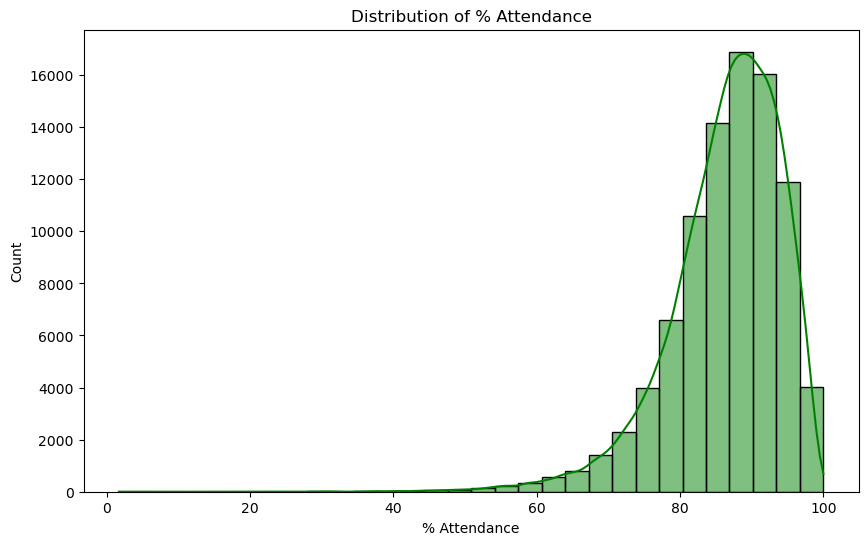

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(attendance['% Attendance'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of % Attendance')
plt.xlabel('% Attendance')
plt.ylabel('Count')
plt.show()


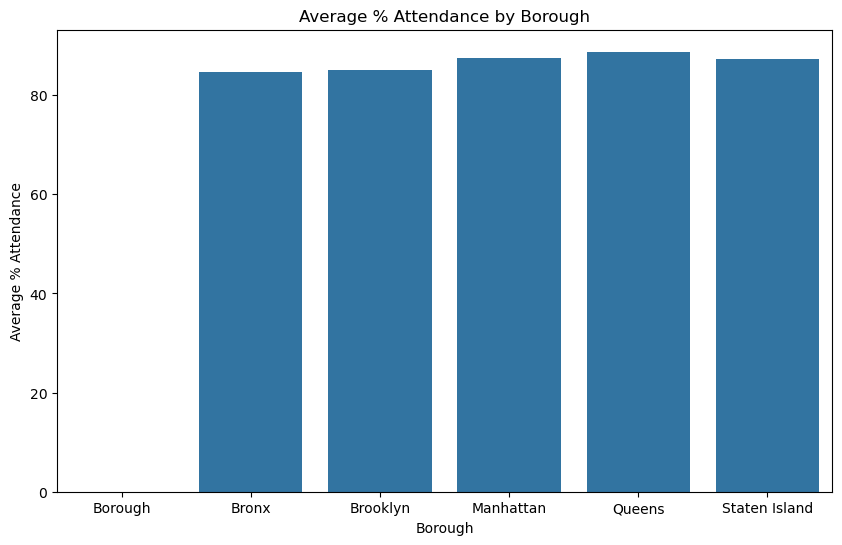

In [129]:
attendance_borough = attendance.groupby('Borough')['% Attendance'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=attendance_borough, x='Borough', y='% Attendance')
plt.title('Average % Attendance by Borough')
plt.xlabel('Borough')
plt.ylabel('Average % Attendance')
plt.show()


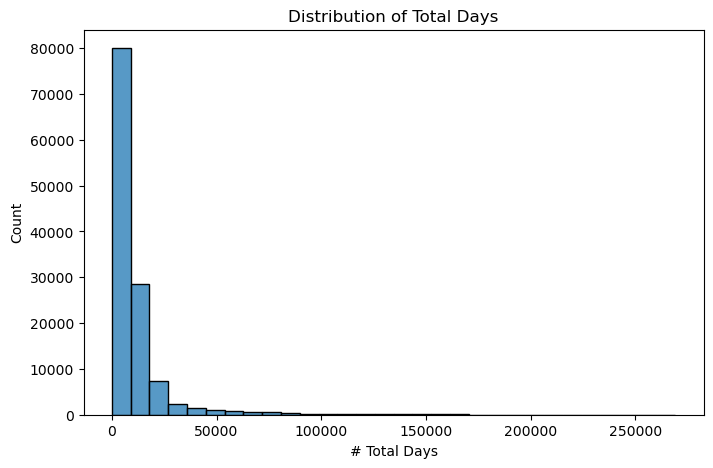

In [130]:
plt.figure(figsize=(8,5))
sns.histplot(data=attendance, x="# Total Days", bins=30, kde=False)
plt.title("Distribution of Total Days")
plt.xlabel("# Total Days")
plt.ylabel("Count")
plt.show()

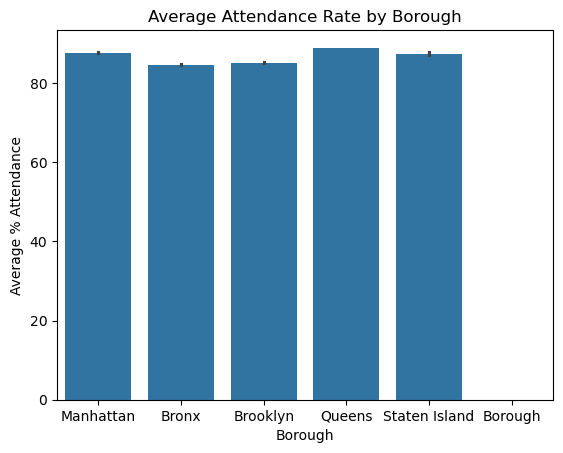

In [131]:
sns.barplot(data=attendance, x='Borough', y='% Attendance', estimator='mean')
plt.title('Average Attendance Rate by Borough')
plt.ylabel('Average % Attendance')
plt.show()

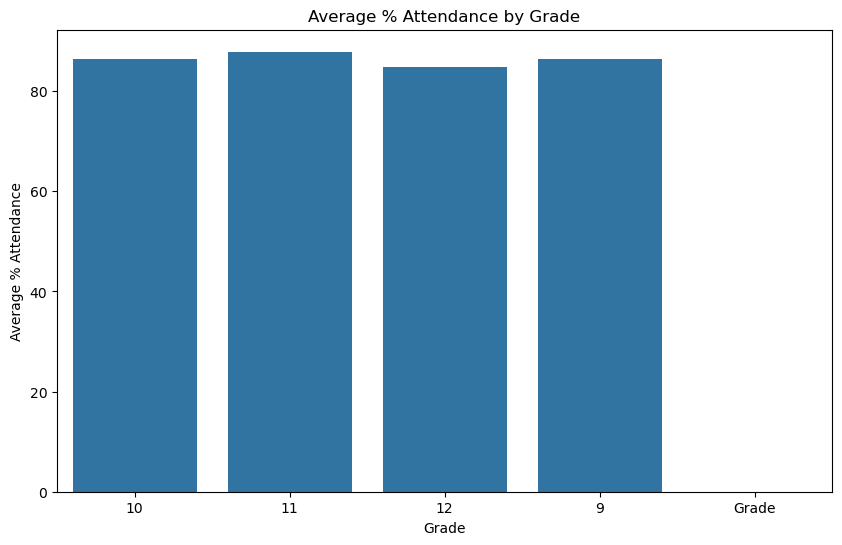

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(data=attendance, x="Grade", y="% Attendance", errorbar=None, order=sorted(attendance["Grade"].unique()))
plt.title("Average % Attendance by Grade")
plt.xlabel("Grade")
plt.ylabel("Average % Attendance")
plt.show()

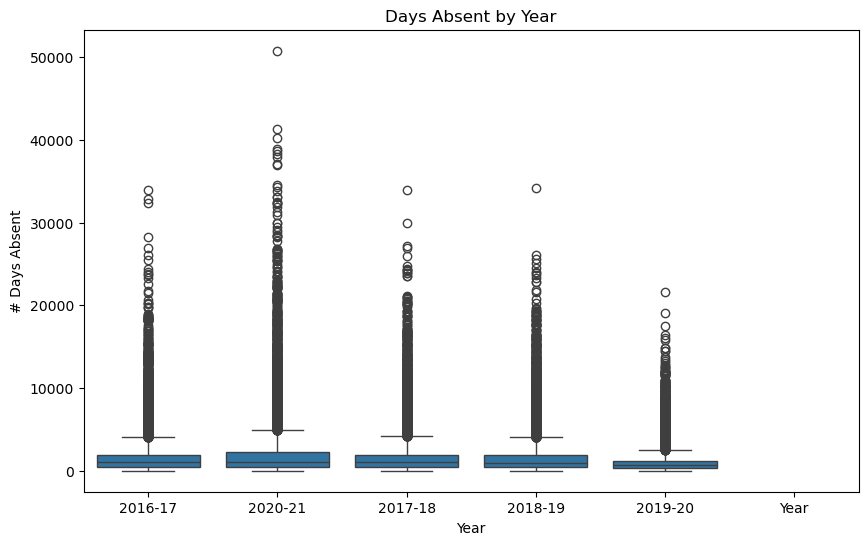

In [133]:
plt.figure(figsize=(10,6))
sns.boxplot(data=attendance, x="Year", y="# Days Absent")
plt.title("Days Absent by Year")
plt.xlabel("Year")
plt.ylabel("# Days Absent")
plt.show()

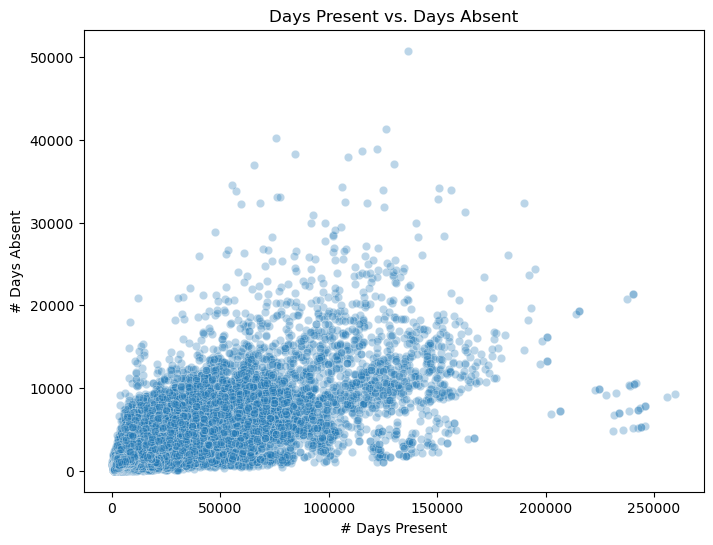

In [134]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=attendance, x="# Days Present", y="# Days Absent", alpha=0.3)
plt.title("Days Present vs. Days Absent")
plt.xlabel("# Days Present")
plt.ylabel("# Days Absent")
plt.show()

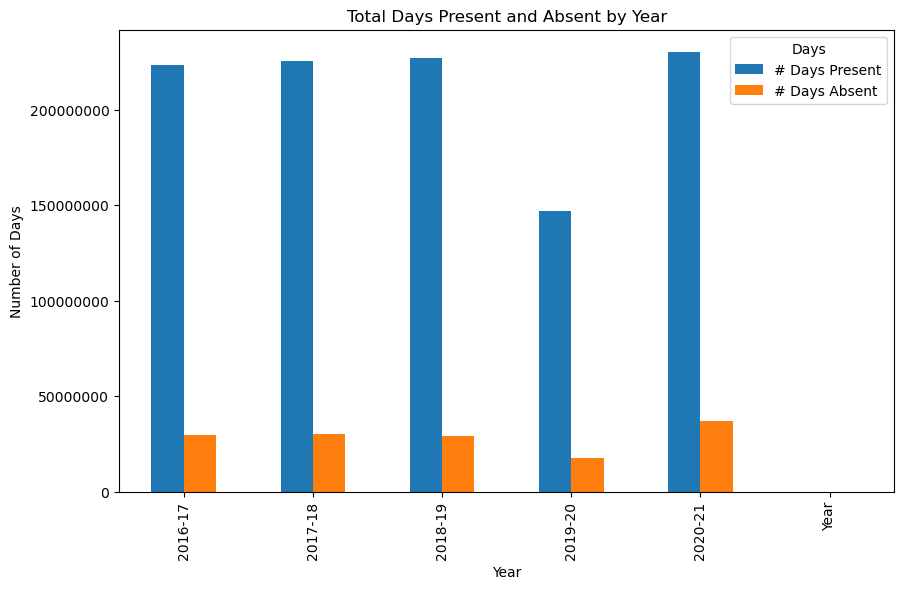

In [ ]:
import matplotlib.ticker as mtick
agg_df = attendance.groupby("Year")[["# Total Days", "# Days Absent", "# Days Present"]].sum()
ax = agg_df[["# Days Present", "# Days Absent"]].plot(kind="bar", stacked=False, figsize=(10,6))

# disable scientific notation on y-axis
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title("Total Days Present and Absent by Year")
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.legend(title="Days")
plt.show()


In [136]:
attendance['Grade'].value_counts()

Grade
9        33244
10       30983
11       30302
12       29991
Grade        5
Name: count, dtype: int64

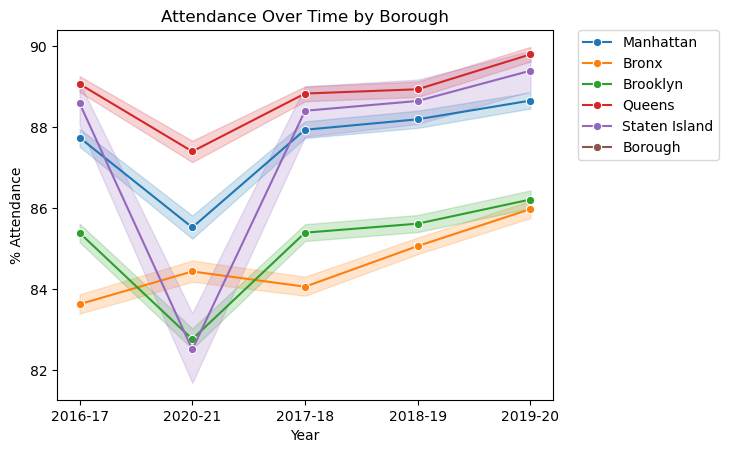

In [137]:
attendance['Year'] = attendance['Year'].astype(str)
sns.lineplot(data=attendance, x='Year', y='% Attendance', hue='Borough', marker='o')
plt.title('Attendance Over Time by Borough')
plt.ylabel('% Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

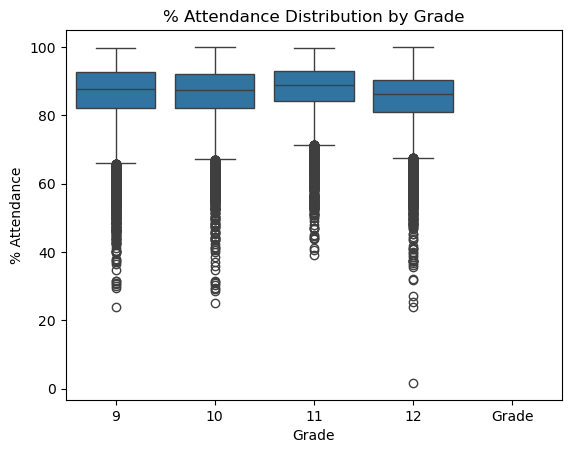

In [138]:
sns.boxplot(data=attendance, x='Grade', y='% Attendance')
plt.title('% Attendance Distribution by Grade')
plt.show()

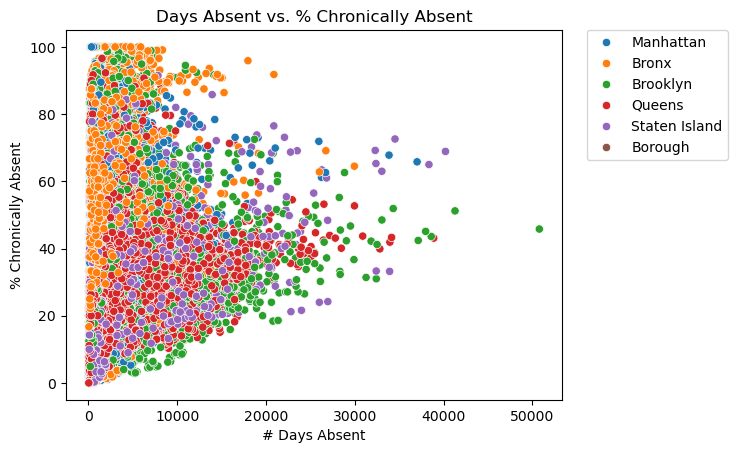

In [139]:
sns.scatterplot(data=attendance, x='# Days Absent', y='% Chronically Absent', hue='Borough')
plt.title('Days Absent vs. % Chronically Absent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

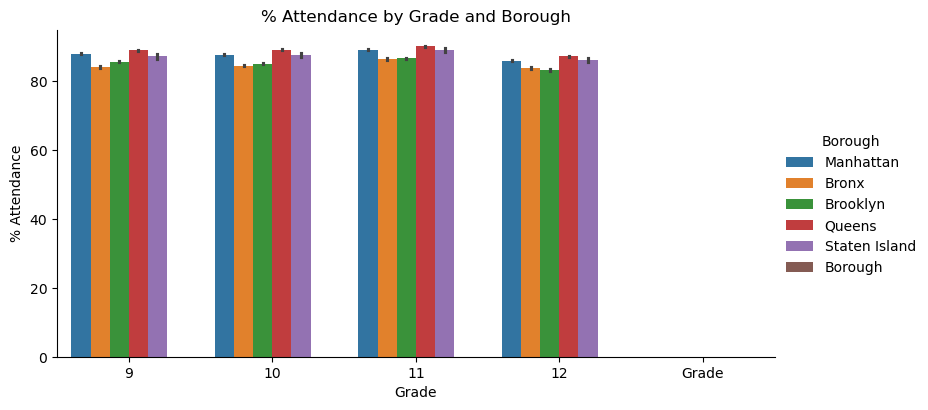

In [140]:
sns.catplot(data=attendance, x='Grade', y='% Attendance', hue='Borough', kind='bar', height=4, aspect=2)
plt.title('% Attendance by Grade and Borough')
plt.show()

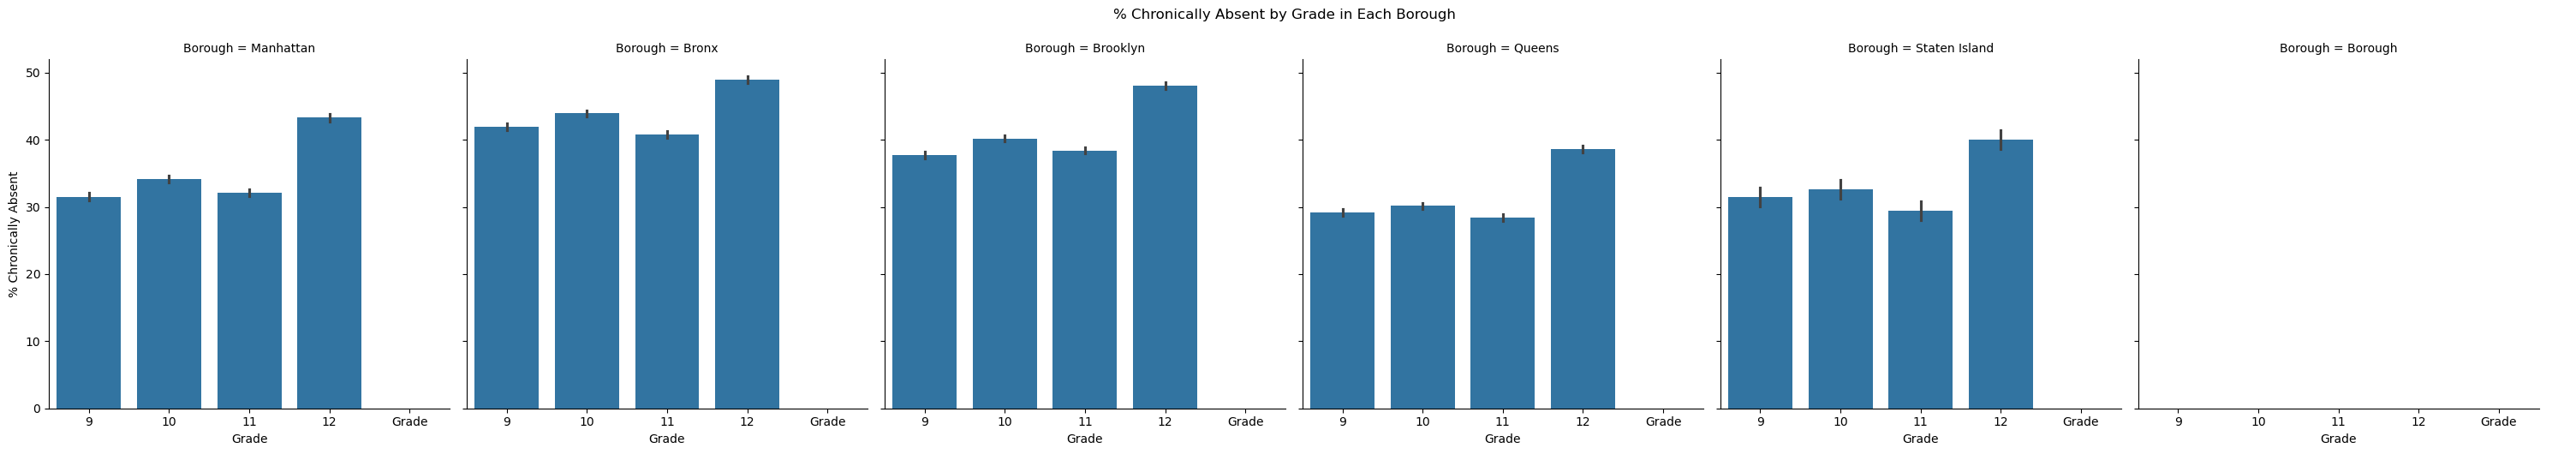

In [141]:
by_borough = sns.catplot(data=attendance, x='Grade', y='% Chronically Absent', col='Borough', kind='bar')
by_borough.fig.suptitle('% Chronically Absent by Grade in Each Borough', y=1.05)
plt.show()


In [142]:
attendance2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Borough                                        1725 non-null   object
 1   Grade                                          1725 non-null   object
 2   Category                                       1725 non-null   object
 3   Year                                           1725 non-null   object
 4   # Total Days                                   1725 non-null   object
 5   # Days Absent                                  1725 non-null   object
 6   # Days Present                                 1725 non-null   object
 7   % Attendance                                   1725 non-null   object
 8   # Contributing 10+ Total Days and 1+ Pres Day  1725 non-null   object
 9   # Chronically Absent                           1725 non-null   

In [ ]:
numeric_cols = [
    '# Total Days',
    '# Days Absent',
    '# Days Present',
    '% Attendance',
    '# Contributing 10+ Total Days and 1+ Pres Day',
    '# Chronically Absent',
    '% Chronically Absent'
]
# clean and convert numeric-looking columns
for col in numeric_cols:
    attendance2[col] = (
        attendance2[col]
        .astype(str)
        .str.replace('%', '', regex=False)
        .str.replace('#', '', regex=False)
        .str.replace(',', '', regex=False)
        .replace('s', pd.NA)
    )
    attendance2[col] = pd.to_numeric(attendance2[col], errors='coerce')

In [144]:
attendance2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Borough                                        1725 non-null   object 
 1   Grade                                          1725 non-null   object 
 2   Category                                       1725 non-null   object 
 3   Year                                           1725 non-null   object 
 4   # Total Days                                   1720 non-null   float64
 5   # Days Absent                                  1665 non-null   float64
 6   # Days Present                                 1665 non-null   float64
 7   % Attendance                                   1665 non-null   float64
 8   # Contributing 10+ Total Days and 1+ Pres Day  1665 non-null   float64
 9   # Chronically Absent                           1664 

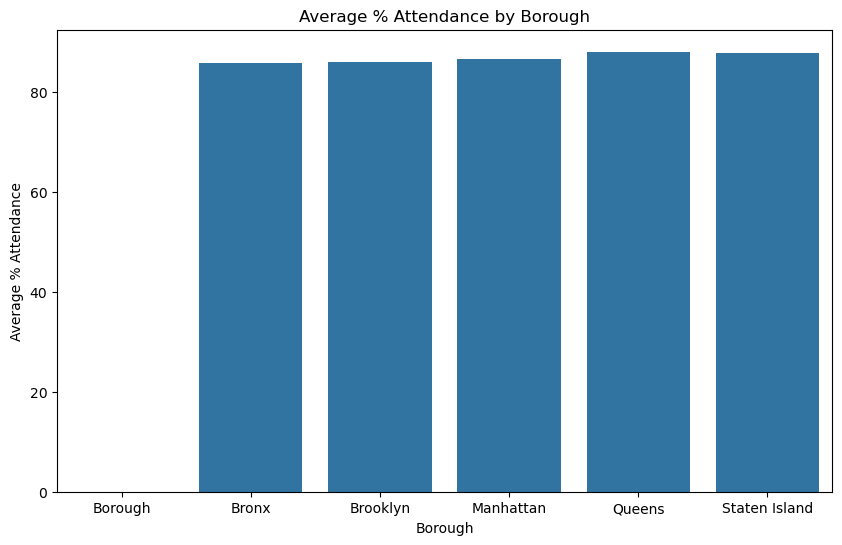

In [169]:
attendance_borough2 = attendance2.groupby('Borough')['% Attendance'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=attendance_borough2, x='Borough', y='% Attendance')
plt.title('Average % Attendance by Borough')
plt.xlabel('Borough')
plt.ylabel('Average % Attendance')
plt.show()


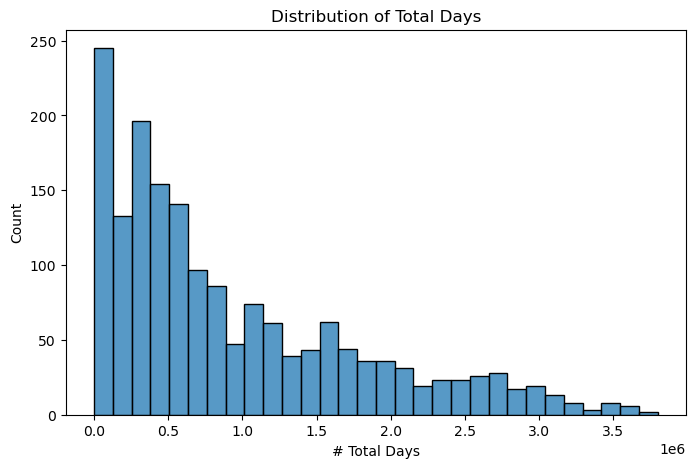

In [170]:
plt.figure(figsize=(8,5))
sns.histplot(data=attendance2, x="# Total Days", bins=30, kde=False)
plt.title("Distribution of Total Days")
plt.xlabel("# Total Days")
plt.ylabel("Count")
plt.show()

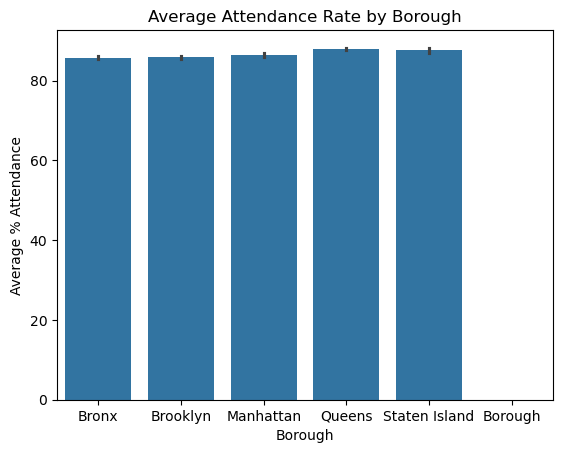

In [171]:
sns.barplot(data=attendance2, x='Borough', y='% Attendance', estimator='mean')
plt.title('Average Attendance Rate by Borough')
plt.ylabel('Average % Attendance')
plt.show()

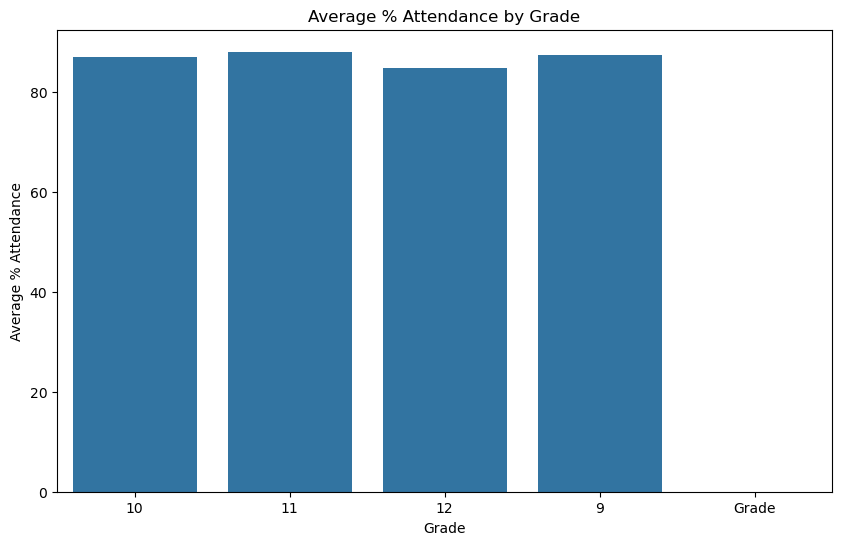

In [172]:
plt.figure(figsize=(10,6))
sns.barplot(data=attendance2, x="Grade", y="% Attendance", errorbar=None, order=sorted(attendance["Grade"].unique()))
plt.title("Average % Attendance by Grade")
plt.xlabel("Grade")
plt.ylabel("Average % Attendance")
plt.show()

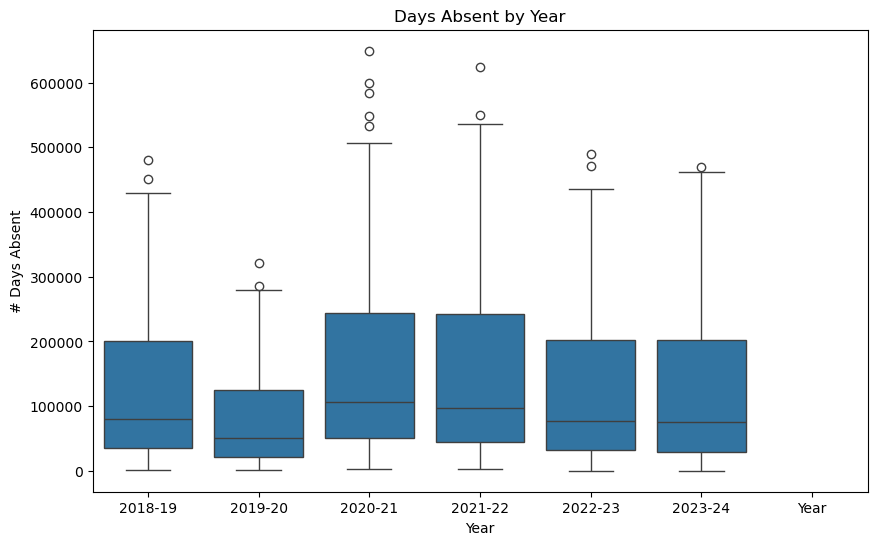

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(data=attendance2, x="Year", y="# Days Absent")
plt.title("Days Absent by Year")
plt.xlabel("Year")
plt.ylabel("# Days Absent")
plt.show()

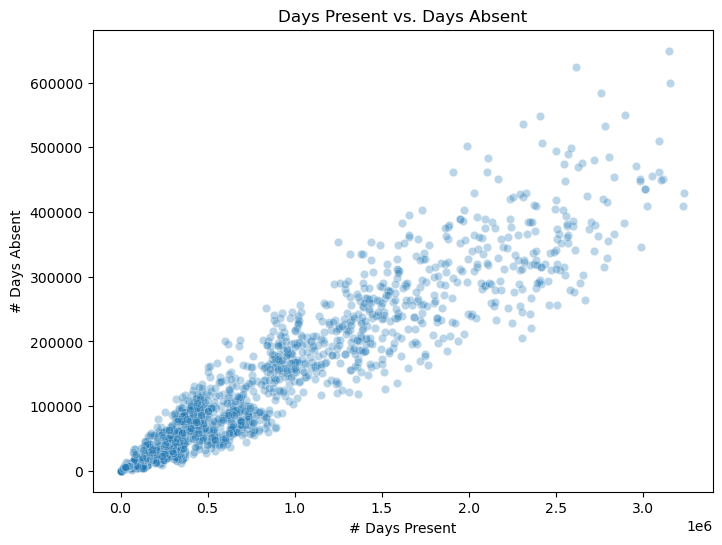

In [174]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=attendance2, x="# Days Present", y="# Days Absent", alpha=0.3)
plt.title("Days Present vs. Days Absent")
plt.xlabel("# Days Present")
plt.ylabel("# Days Absent")
plt.show()

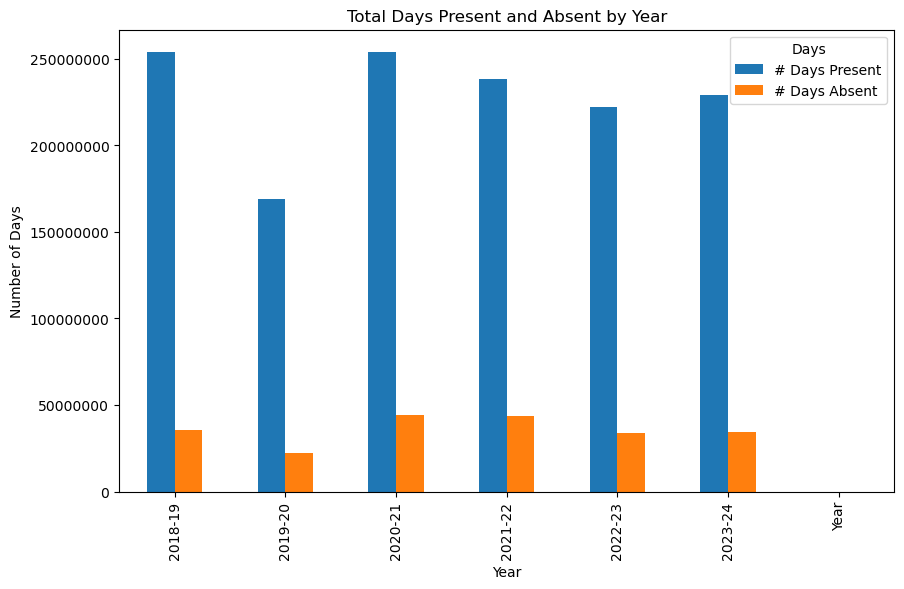

In [ ]:
import matplotlib.ticker as mtick
agg_df = attendance2.groupby("Year")[["# Total Days", "# Days Absent", "# Days Present"]].sum()
ax = agg_df[["# Days Present", "# Days Absent"]].plot(kind="bar", stacked=False, figsize=(10,6))

# disable scientific notation on y-axis
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title("Total Days Present and Absent by Year")
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.legend(title="Days")
plt.show()


In [176]:
attendance2['Grade'].value_counts()

Grade
9        430
10       430
11       430
12       430
Grade      5
Name: count, dtype: int64

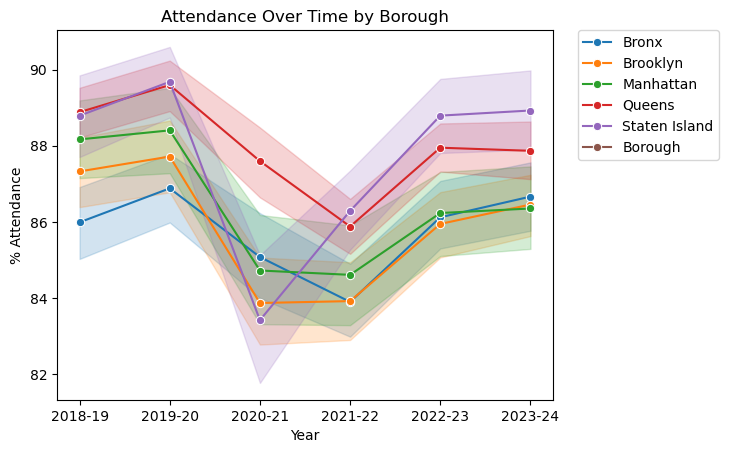

In [177]:
attendance2['Year'] = attendance2['Year'].astype(str)
sns.lineplot(data=attendance2, x='Year', y='% Attendance', hue='Borough', marker='o')
plt.title('Attendance Over Time by Borough')
plt.ylabel('% Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

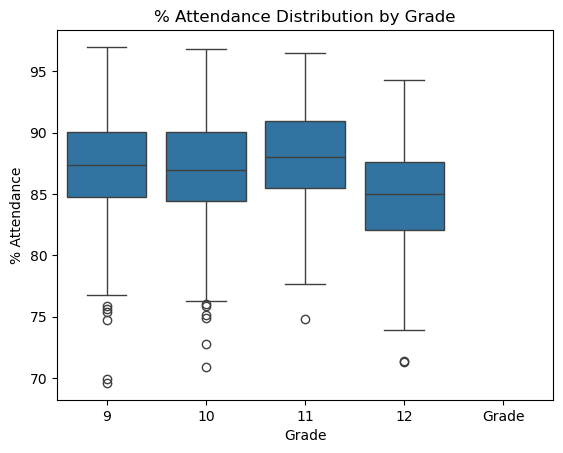

In [178]:
sns.boxplot(data=attendance2, x='Grade', y='% Attendance')
plt.title('% Attendance Distribution by Grade')
plt.show()

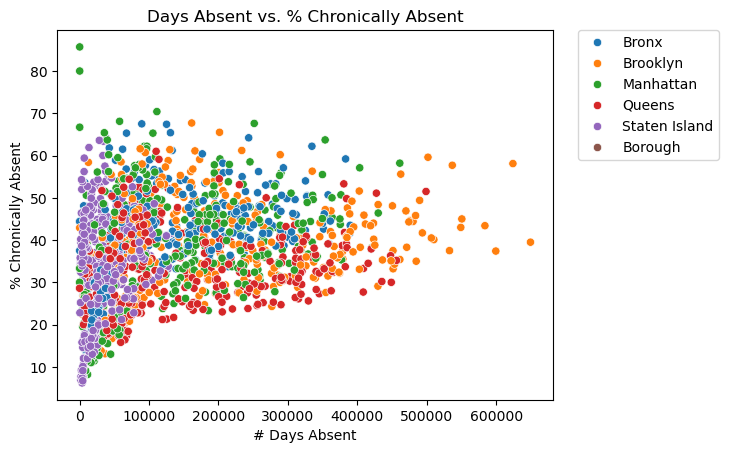

In [179]:
sns.scatterplot(data=attendance2, x='# Days Absent', y='% Chronically Absent', hue='Borough')
plt.title('Days Absent vs. % Chronically Absent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

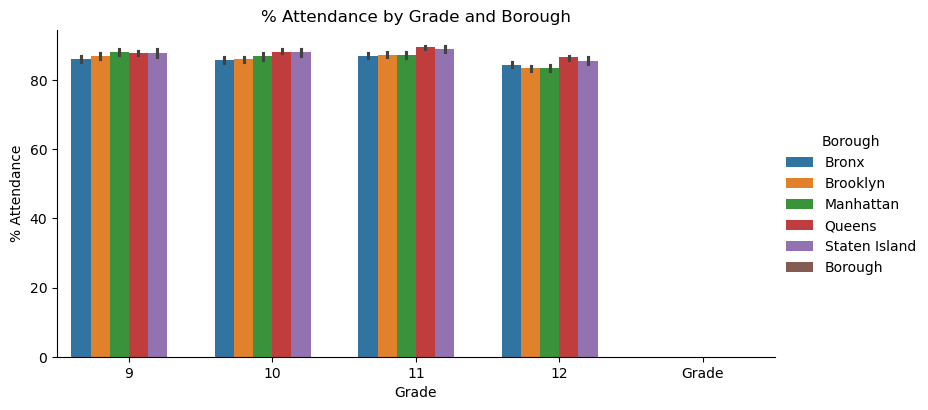

In [180]:
sns.catplot(data=attendance2, x='Grade', y='% Attendance', hue='Borough', kind='bar', height=4, aspect=2)
plt.title('% Attendance by Grade and Borough')
plt.show()

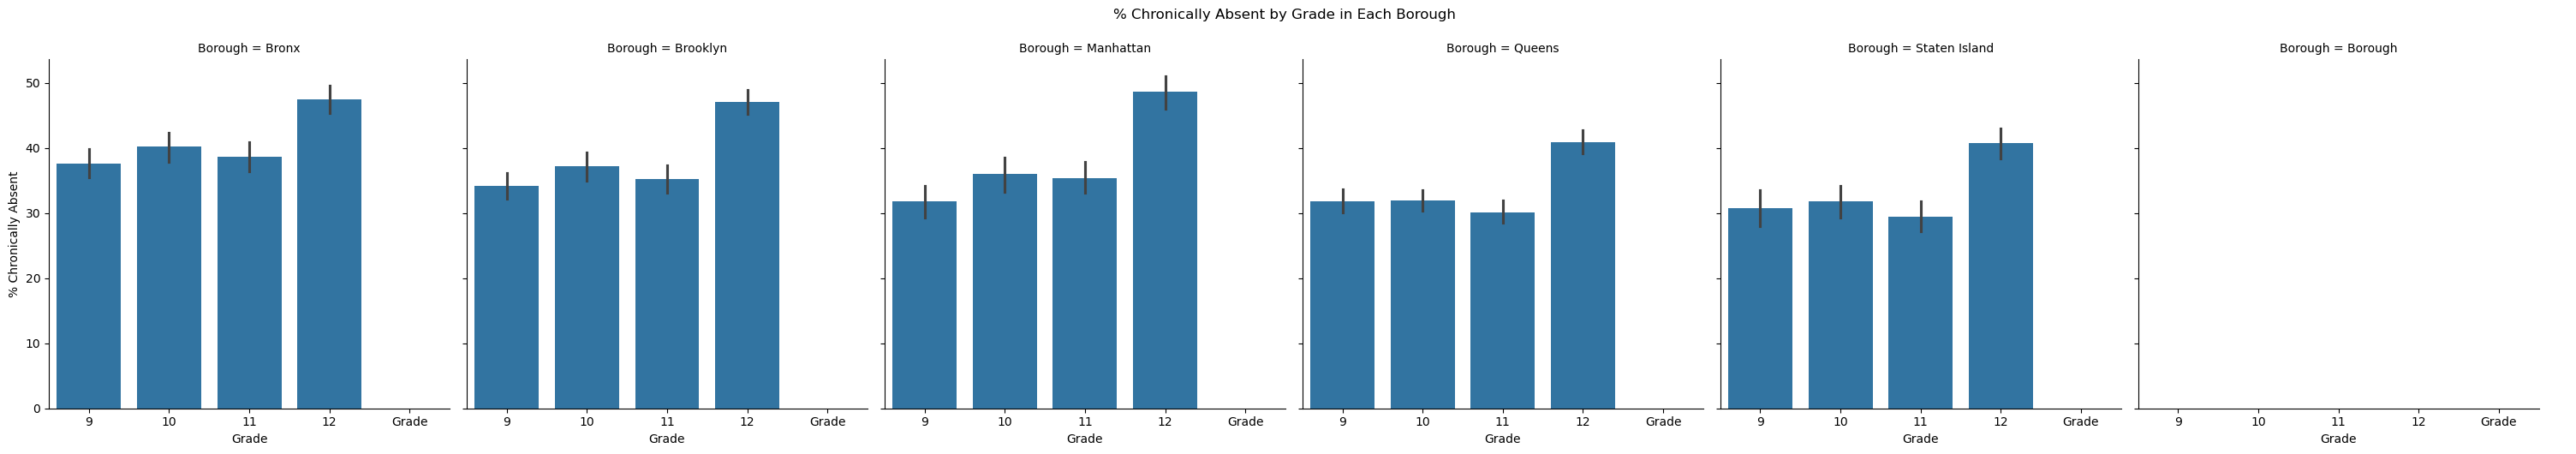

In [181]:
by_borough = sns.catplot(data=attendance2, x='Grade', y='% Chronically Absent', col='Borough', kind='bar')
by_borough.fig.suptitle('% Chronically Absent by Grade in Each Borough', y=1.05)
plt.show()


In [145]:
regents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372177 entries, 0 to 372176
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype 
---  ------                                         --------------   ----- 
 0   School DBN                                     372177 non-null  object
 1   Borough                                        372177 non-null  object
 2   School Name                                    372177 non-null  object
 3   School Type                                    372177 non-null  object
 4   School Level                                   372177 non-null  object
 5   Regents Exam                                   372177 non-null  object
 6   Year                                           372177 non-null  object
 7   Category                                       372176 non-null  object
 8   Total Tested                                   372177 non-null  object
 9   Mean Score                                     3

In [156]:
# List of columns to convert to numeric
score_columns = [
    'Total Tested',
    'Mean Score',
    'Number Scoring Below 65',
    'Percent Scoring Below 65',
    'Number Scoring 65 or Above',
    'Percent Scoring 65 or Above',
    'Number Scoring 80 or Above',
    'Percent Scoring 80 or Above',
    'Number meeting CUNY proficiency requirmenets',
    'Percent meeting CUNY proficiency requirmenets'
]

# Clean and convertfor col in score_columns:
for col in score_columns:
    regents[col] = pd.to_numeric(regents[col], errors='coerce')

In [157]:
regents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372177 entries, 0 to 372176
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   School DBN                                     372177 non-null  object 
 1   Borough                                        372177 non-null  object 
 2   School Name                                    372177 non-null  object 
 3   School Type                                    372177 non-null  object 
 4   School Level                                   372177 non-null  object 
 5   Regents Exam                                   372177 non-null  object 
 6   Year                                           372177 non-null  object 
 7   Category                                       372176 non-null  object 
 8   Total Tested                                   372173 non-null  float64
 9   Mean Score                           

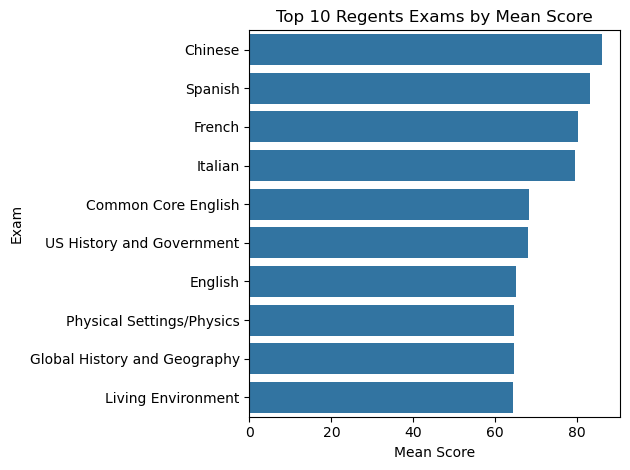

In [158]:
# Group and average
mean_scores = regents.groupby('Regents Exam')['Mean Score'].mean().sort_values(ascending=False)

# Plot top 10 exams by mean score
sns.barplot(x=mean_scores.head(10), y=mean_scores.head(10).index)
plt.title('Top 10 Regents Exams by Mean Score')
plt.xlabel('Mean Score')
plt.ylabel('Exam')
plt.tight_layout()
plt.show()

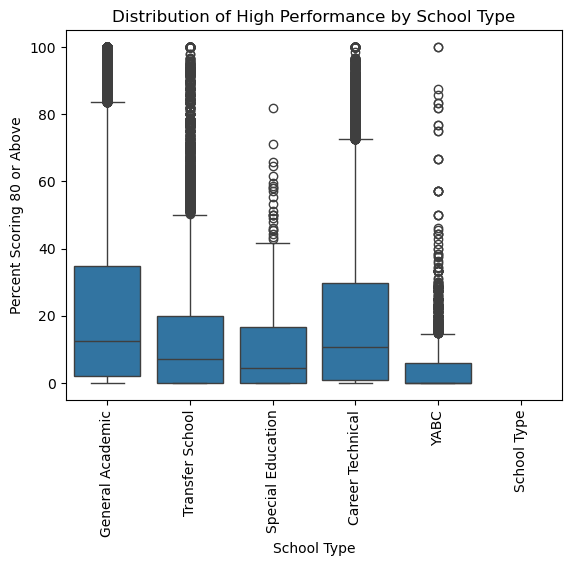

In [159]:
sns.boxplot(data=regents, x='School Type', y='Percent Scoring 80 or Above')
plt.title('Distribution of High Performance by School Type')
plt.xticks(rotation=90)
plt.show()


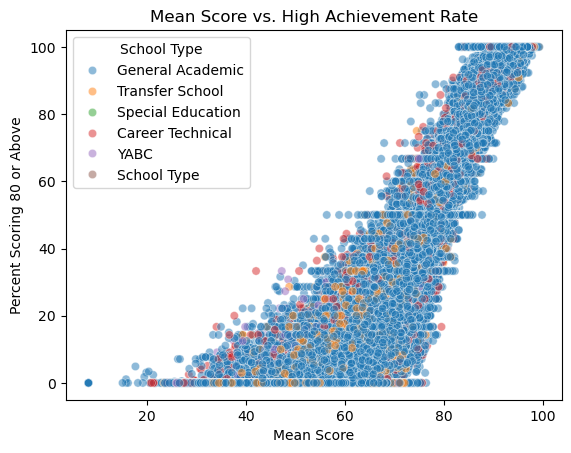

In [160]:
sns.scatterplot(data=regents, x='Mean Score', y='Percent Scoring 80 or Above', hue='School Type', alpha=0.5)
plt.title('Mean Score vs. High Achievement Rate')
plt.show()

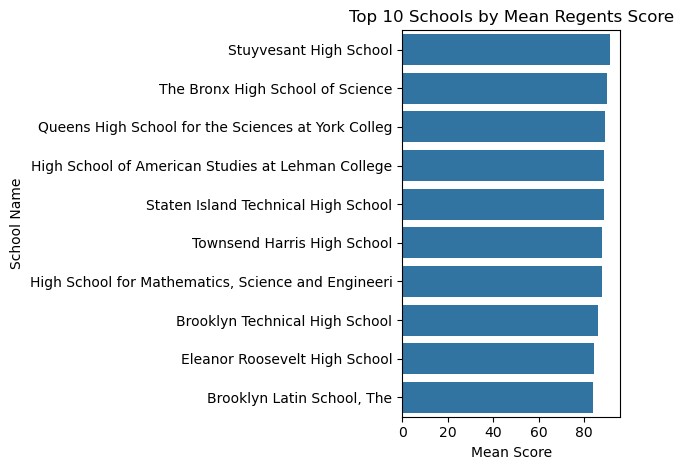

In [161]:
top_schools = (regents.groupby('School Name')['Mean Score'].mean().sort_values(ascending=False).head(10))
sns.barplot(x=top_schools.values, y=top_schools.index)
plt.title('Top 10 Schools by Mean Regents Score')
plt.xlabel('Mean Score')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()


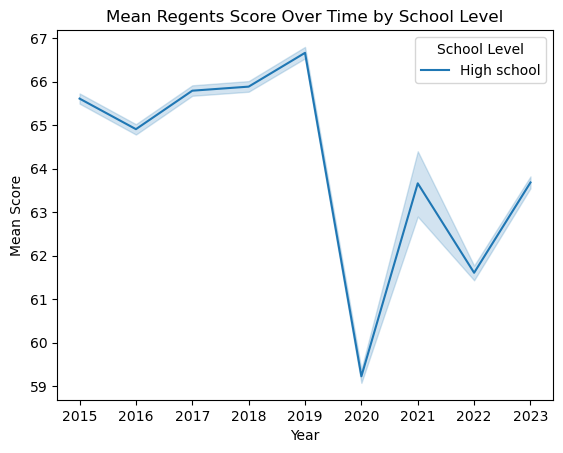

In [162]:
# Drop nulls and make a copy safely
df_filtered = regents.dropna(subset=['Year', 'Mean Score']).copy()

# Convert Year to integer
df_filtered['Year'] = df_filtered['Year'].astype(int)
sns.lineplot(data=df_filtered, x='Year', y='Mean Score', hue='School Level', estimator='mean')
plt.title('Mean Regents Score Over Time by School Level')
plt.ylabel('Mean Score')
plt.show()

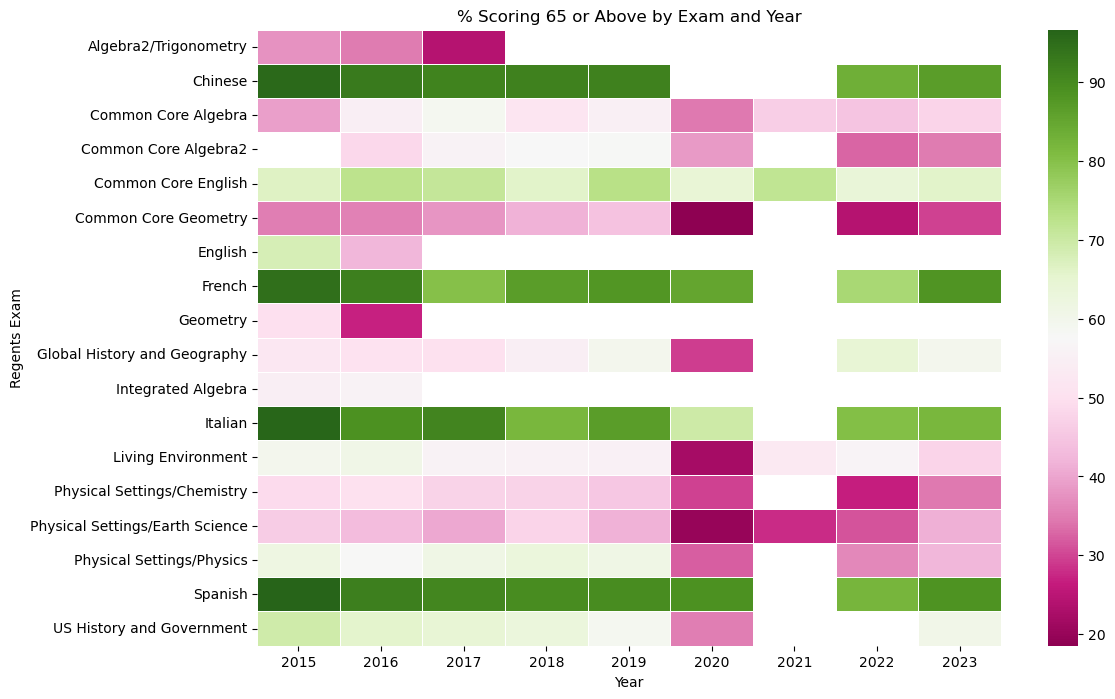

In [163]:
# Pivot for heatmap
pivot = regents.pivot_table(index='Regents Exam', columns='Year', values='Percent Scoring 65 or Above', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='PiYG', annot=False, linewidths=0.5)
plt.title('% Scoring 65 or Above by Exam and Year')
plt.xlabel('Year')
plt.ylabel('Regents Exam')
plt.show()


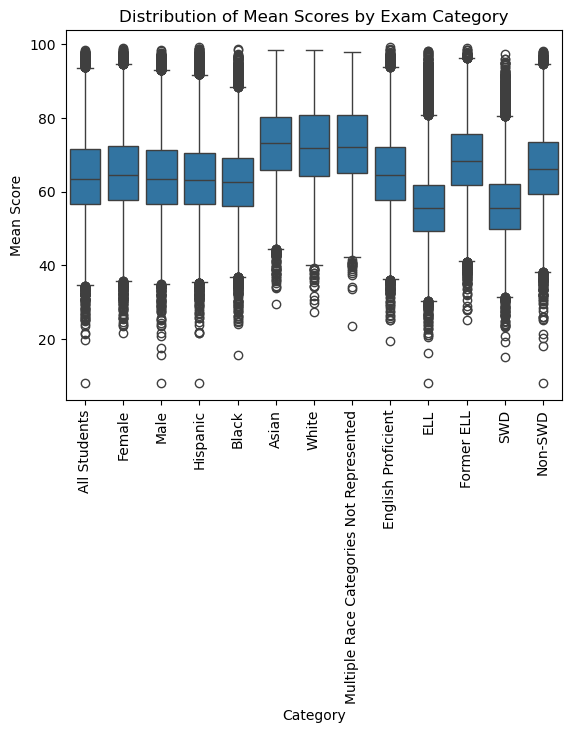

In [164]:
df_box = regents.dropna(subset=['Mean Score'])

sns.boxplot(data=df_box, x='Category', y='Mean Score')
plt.title('Distribution of Mean Scores by Exam Category')
plt.xticks(rotation=90)
plt.show()


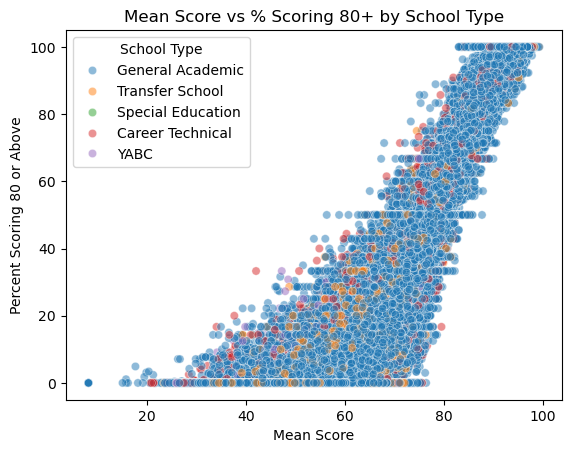

In [165]:
df_scatter = regents.dropna(subset=['Mean Score', 'Percent Scoring 80 or Above'])

sns.scatterplot(data=df_scatter, x='Mean Score', y='Percent Scoring 80 or Above', hue='School Type', alpha=0.5)
plt.title('Mean Score vs % Scoring 80+ by School Type')
plt.show()